In [1]:
#Adds higher directory to path to access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

# Load and Subset Data

<Item title:"Wetland_Delineation_v2" type:Feature Layer Collection owner:Anooshi>
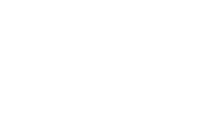

In [2]:
output = arcGIS_data_load('d479de4cd76547c1ab355faaef5808de')
pts = output['data0'] #point data
poly = output['data1'] #Polygon data
feature_service = output['feature_service']

In [4]:
poly.columns

Index(['BHR_Site', 'Comments', 'Date', 'GlobalID', 'OBJECTID', 'Observer',
       'SHAPE', 'Shape__Area', 'Shape__Length', 'Wetland_ID'],
      dtype='object')

In [5]:
# Subset by year
pts.rename(columns={"Final_Date": "Observation_Date"}, inplace=True)
poly.rename(columns={'Date':'Observation_Date'},inplace=True)

sYear = input("Start Year? (YYYY)")
ptsSub = year_subset(pts, sYear)
polySub = year_subset(poly, sYear)

Start Year? (YYYY)2018
Analysis for 2018-10-01 07:00 UTC to 2019-10-01 07:00 UTC
Entries in Subset: 14
Analysis for 2018-10-01 07:00 UTC to 2019-10-01 07:00 UTC
Entries in Subset: 5


# QAQC - Points

In [6]:
#QAQC Whitespaces
QAQC_whitespace(pts)

Name of Object ID Column:  ['OBJECTID']


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Hydric_Soil_Present
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Hydrophytic_Vegetation_Present
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Sampled_Area_Within_Wetland
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Sampling_Point
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Sur

In [7]:
find_blank_entries(pts)

No blank BHR_Site
No blank Observation_Date
No blank GlobalID
No blank Hydric_Soil_Present
No blank Hydrophytic_Vegetation_Present
No blank OBJECTID
No blank SHAPE
No blank Sampled_Area_Within_Wetland
Blank Sampling_Point entrie(s) exist!


,BHR_Site,Observation_Date,GlobalID,Hydric_Soil_Present,Hydrophytic_Vegetation_Present,OBJECTID,SHAPE,Sampled_Area_Within_Wetland,Sampling_Point,Surveyor1,Surveyor2,Wetland_Hydrology_Present,Wetland_ID
5,SAC,2019-05-06 20:03:31,13e27f64-040e-46ac-8127-17960bf80aef,No,No,7,"{""x"": 6188073.414705391, ""y"": 2038065.55053599...",No,None,Russell Huddleston,Kevin Sherrill,Yes,SW7.2a


No blank Surveyor1
No blank Surveyor2
No blank Wetland_Hydrology_Present
No blank Wetland_ID


In [9]:
QAQC_plot(pts,['BHR_Site', 'Observation_Date', 'Hydric_Soil_Present',
       'Hydrophytic_Vegetation_Present',
       'Sampled_Area_Within_Wetland', 'Sampling_Point', 'Surveyor1',
       'Surveyor2', 'Wetland_Hydrology_Present', 'Wetland_ID'])

# QAQC - Polygons

In [10]:
#QAQC Whitespaces
QAQC_whitespace(poly)

Name of Object ID Column:  ['OBJECTID']


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Comments
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Observer
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Wetland_ID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


In [11]:
find_blank_entries(poly)

No blank BHR_Site
No blank Comments
No blank Observation_Date
No blank GlobalID
No blank OBJECTID
No blank Observer
No blank SHAPE
No blank Shape__Area
No blank Shape__Length
No blank Wetland_ID


In [13]:
QAQC_plot(poly, ['BHR_Site', 'Observation_Date', 'Observer', 'Wetland_ID'])

# Export Data Deliverable

In [14]:
field_order = [
'BHR_Site', 
'Observation_Date', 
'Surveyor1',
'Surveyor2',
'Wetland_ID',
'Sampling_Point',
'Hydrophytic_Vegetation_Present', 
'Wetland_Hydrology_Present',
'Hydric_Soil_Present',
'Sampled_Area_Within_Wetland', 

'OBJECTID', 
'GlobalID', 
'SHAPE',
]

In [15]:
export_data_deliverable(pts, feature_service, field_order, layer_num=0, file_name='SAC_Wetland_Delineation_Points')

No Related Table Found
Exported to G:/Scripts_Toolboxes/Annual_Report/Outputs/SAC_Wetland_Delineation_Points_Data_20191206.xlsx


In [16]:
field_order = [
'BHR_Site',
'Observation_Date',
'Observer',
'Wetland_ID',
'Comments', 
'OBJECTID',
'GlobalID',  
'SHAPE', 
'Shape__Area', 
'Shape__Length', 
]

In [17]:
export_data_deliverable(poly, feature_service, field_order, layer_num=1, file_name='SAC_Wetland_Delineation_Polygons')

No Related Table Found
Exported to G:/Scripts_Toolboxes/Annual_Report/Outputs/SAC_Wetland_Delineation_Polygons_Data_20191206.xlsx
